In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def calculate_histogram(image):
    histogram = np.zeros(256, dtype=int)
    
    for pixel_value in image.flatten():
        pixel_value = int(pixel_value)  # Convert to integer
        histogram[pixel_value] += 1
    
    return histogram

In [6]:
def histogram_equalization(image):
    # Calculate the histogram of the input image
    histogram = calculate_histogram(image)
    
    # Calculate the cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    
    # Normalize the CDF
    cdf_normalized = cdf / cdf[-1]
    
    # Calculate the new pixel values using the CDF
    equalized_image = np.interp(image.flatten(), np.arange(256), cdf_normalized * 255).reshape(image.shape)
    
    return equalized_image.astype(np.uint8)

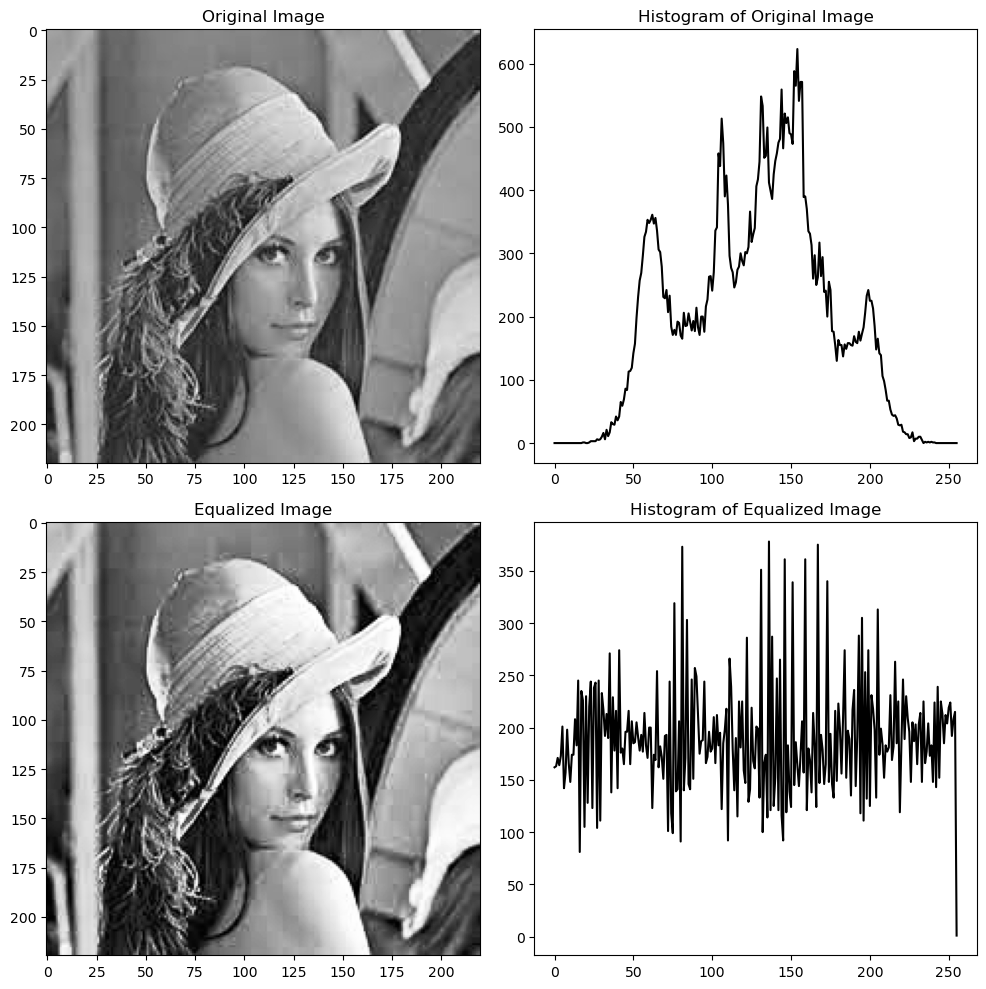

In [8]:
# Load the input image
input_image = plt.imread("Lena.jpg")

# Convert the image to grayscale if needed
if len(input_image.shape) == 3:
    input_image = input_image.mean(axis=2)

# Perform histogram equalization
equalized_image = histogram_equalization(input_image)

# Plot the original and equalized images
plt.figure(figsize=(10, 10))

# Plot the original image
plt.subplot(2, 2, 1)
plt.imshow(input_image, cmap="gray")
plt.title("Original Image")

# Plot the histogram of the original image
plt.subplot(2, 2, 2)
hist_original, bins_original = np.histogram(input_image.flatten(), bins=256, range=[0,256])
plt.plot(hist_original, color='black')
plt.title("Histogram of Original Image")

# Plot the equalized image
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap="gray")
plt.title("Equalized Image")

# Plot the histogram of the equalized image
plt.subplot(2, 2, 4)
hist_equalized, bins_equalized = np.histogram(equalized_image.flatten(), bins=256, range=[0,256])
plt.plot(hist_equalized, color='black')
plt.title("Histogram of Equalized Image")

plt.tight_layout()
plt.show()